Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-01-08 21:30:18.839825: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-08 21:30:18.858170: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 21:30:18.961846: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 21:30:18.961905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 21:30:18.981524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("skin_cancer_images/Train")
data_dir_test = pathlib.Path('skin_cancer_images/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [121]:
(train_images_set,val_images_set)=tf.keras.utils.image_dataset_from_directory(data_dir_train,seed=120,image_size=(128,128),validation_split=0.2,subset="both")

test_images_set=tf.keras.utils.image_dataset_from_directory(data_dir_test,image_size=(128,128))

#,label_mode='categorical'

#print(list(train_images_set))#.class_names
#train_images_set[train_images_set.class_names[0]]
#test_images_set=tf.keras.utils.image_dataset_from_directory(data_dir_test)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Using 447 files for validation.
Found 118 files belonging to 9 classes.


### Create a dataset

Define some parameters for the loader:

In [122]:
batch_size = 32
img_height = 128
img_width = 128

Use 80% of the images for training, and 20% for validation.

In [123]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = train_images_set##todo

In [124]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = val_images_set##todo

In [125]:
test_ds=test_images_set

In [126]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [11]:
print(list(train_ds.take(1))[0][0].shape)
print(list(train_ds.take(1))[0][1].shape)
for images, labels in train_ds.take(1):
  print(f"Image Dimensions and Channels : {images[0].shape}")
  print(len(images))
  print(len(labels))

print(f"Total Batches : {len(train_ds)}")

(32, 128, 128, 3)
(32,)
Image Dimensions and Channels : (128, 128, 3)
32
32
Total Batches : 56


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


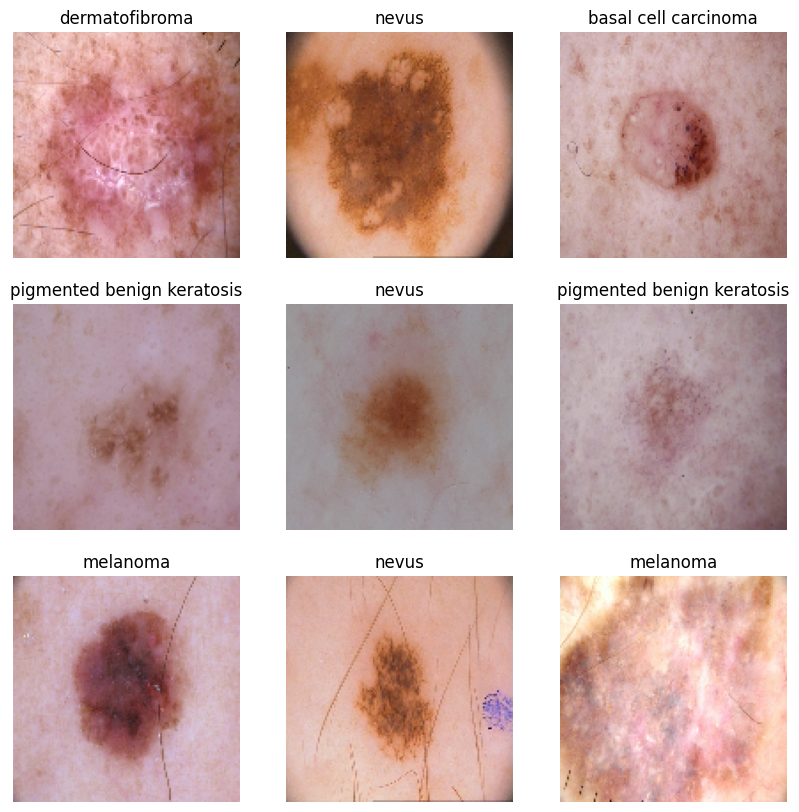

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    print(labels[i])
    ax = plt.subplot(3, 3, i + 1)    
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

### Train the model

In [17]:
epochs = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
56/56 [==============================] - 3s 27ms/step - loss: 2.0452 - accuracy: 0.2188 - val_loss: 1.9273 - val_accuracy: 0.2953
Epoch 2/32
56/56 [==============================] - 1s 20ms/step - loss: 1.8856 - accuracy: 0.3080 - val_loss: 1.7355 - val_accuracy: 0.3893
Epoch 3/32
56/56 [==============================] - 1s 21ms/step - loss: 1.6146 - accuracy: 0.4392 - val_loss: 1.4484 - val_accuracy: 0.5056
Epoch 4/32
56/56 [==============================] - 1s 20ms/step - loss: 1.4979 - accuracy: 0.4782 - val_loss: 1.3922 - val_accuracy: 0.4989
Epoch 5/32
56/56 [==============================] - 1s 19ms/step - loss: 1.3110 - accuracy: 0.5318 - val_loss: 1.3258 - val_accuracy: 0.5570
Epoch 6/32
56/56 [==============================] - 1s 20ms/step - loss: 1.2451 - accuracy: 0.5636 - val_loss: 1.3867 - val_accuracy: 0.5123
Epoch 7/32
56/56 [==============================] - 1s 19ms/step - loss: 1.2055 - accuracy: 0.5765 - val_loss: 1.4203 - val_accuracy: 0.5078
Epoch 8/32
56

### Visualizing training results

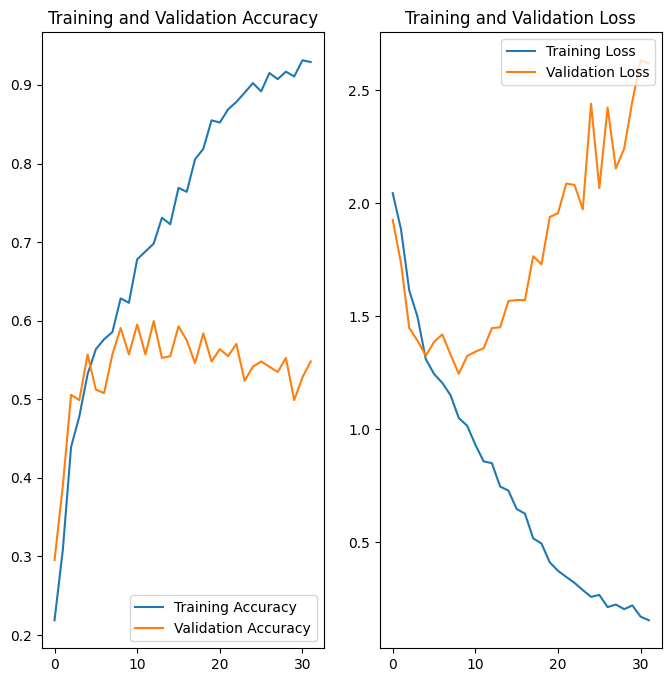

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [25]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
    
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  
  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  layers.Dropout(0.2),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



### Compiling the model

In [26]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 32)        0         
                                                      

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
56/56 [==============================] - 2s 36ms/step - loss: 2.0160 - accuracy: 0.2511 - val_loss: 1.9365 - val_accuracy: 0.2707
Epoch 2/32
56/56 [==============================] - 2s 31ms/step - loss: 1.7672 - accuracy: 0.3728 - val_loss: 1.6934 - val_accuracy: 0.4206
Epoch 3/32
56/56 [==============================] - 2s 30ms/step - loss: 1.6604 - accuracy: 0.4107 - val_loss: 1.7022 - val_accuracy: 0.3937
Epoch 4/32
56/56 [==============================] - 2s 29ms/step - loss: 1.6381 - accuracy: 0.4291 - val_loss: 1.6918 - val_accuracy: 0.4765
Epoch 5/32
56/56 [==============================] - 2s 30ms/step - loss: 1.5122 - accuracy: 0.4704 - val_loss: 1.5514 - val_accuracy: 0.4609
Epoch 6/32
56/56 [==============================] - 2s 28ms/step - loss: 1.4453 - accuracy: 0.4983 - val_loss: 1.6548 - val_accuracy: 0.4385
Epoch 7/32
56/56 [==============================] - 2s 30ms/step - loss: 1.4413 - accuracy: 0.4927 - val_loss: 1.4486 - val_accuracy: 0.4855
Epoch 8/32
56

### Visualizing the results

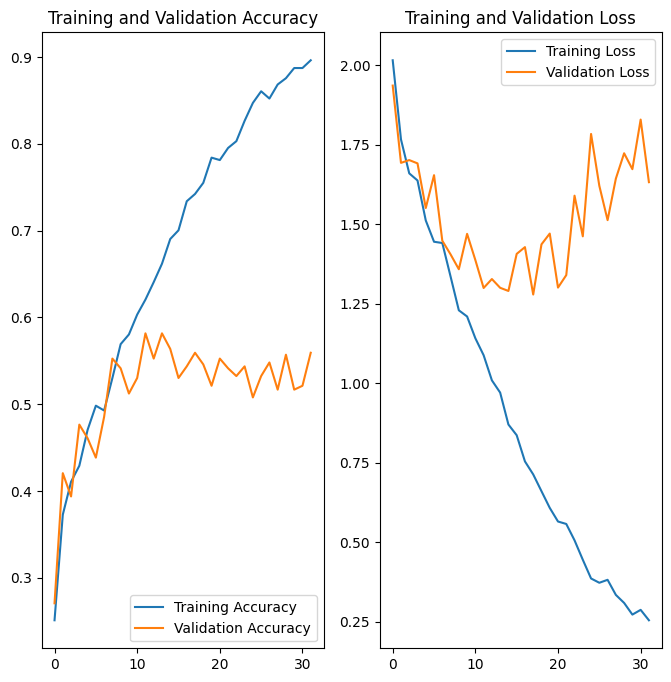

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
    
  layers.MaxPooling2D(),

  layers.Conv2D(96, 3, padding='same', activation='relu'),
  
  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  
  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),    

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  #layers.Dense(128, activation='relu'),

  #layers.Dropout(0.2),

  layers.Dense(512, activation='relu'),

  layers.Dropout(0.2),
    
  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 64)        0         
                                                      

In [28]:
## Your code goes here, note: train your model for 20 epochs
epochs = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
56/56 [==============================] - 4s 74ms/step - loss: 2.0514 - accuracy: 0.2439 - val_loss: 1.9716 - val_accuracy: 0.2796
Epoch 2/32
56/56 [==============================] - 4s 71ms/step - loss: 1.7807 - accuracy: 0.3432 - val_loss: 1.7486 - val_accuracy: 0.3870
Epoch 3/32
56/56 [==============================] - 4s 71ms/step - loss: 1.6756 - accuracy: 0.4029 - val_loss: 1.7754 - val_accuracy: 0.3311
Epoch 4/32
56/56 [==============================] - 4s 71ms/step - loss: 1.5465 - accuracy: 0.4593 - val_loss: 1.6163 - val_accuracy: 0.4765
Epoch 5/32
56/56 [==============================] - 4s 71ms/step - loss: 1.5172 - accuracy: 0.4743 - val_loss: 1.6413 - val_accuracy: 0.4318
Epoch 6/32
56/56 [==============================] - 4s 71ms/step - loss: 1.4014 - accuracy: 0.5156 - val_loss: 1.4546 - val_accuracy: 0.4989
Epoch 7/32
56/56 [==============================] - 4s 71ms/step - loss: 1.3771 - accuracy: 0.5056 - val_loss: 1.5908 - val_accuracy: 0.4094
Epoch 8/32
56

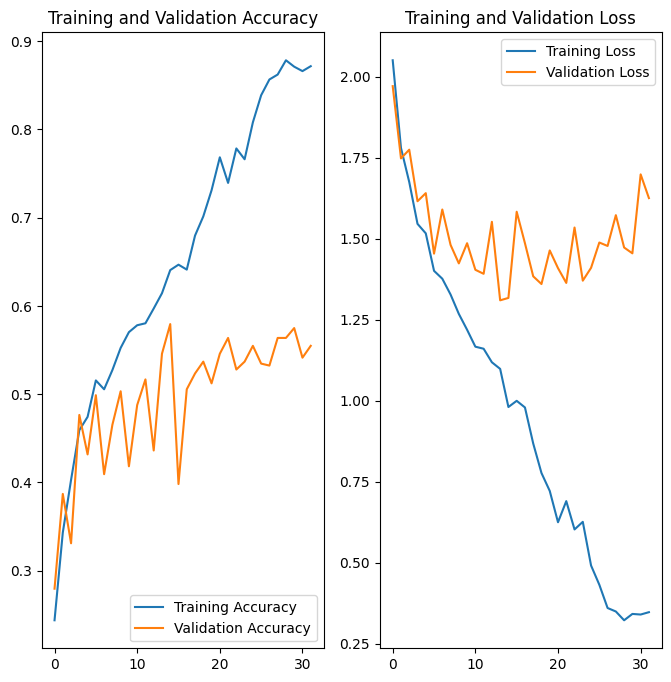

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

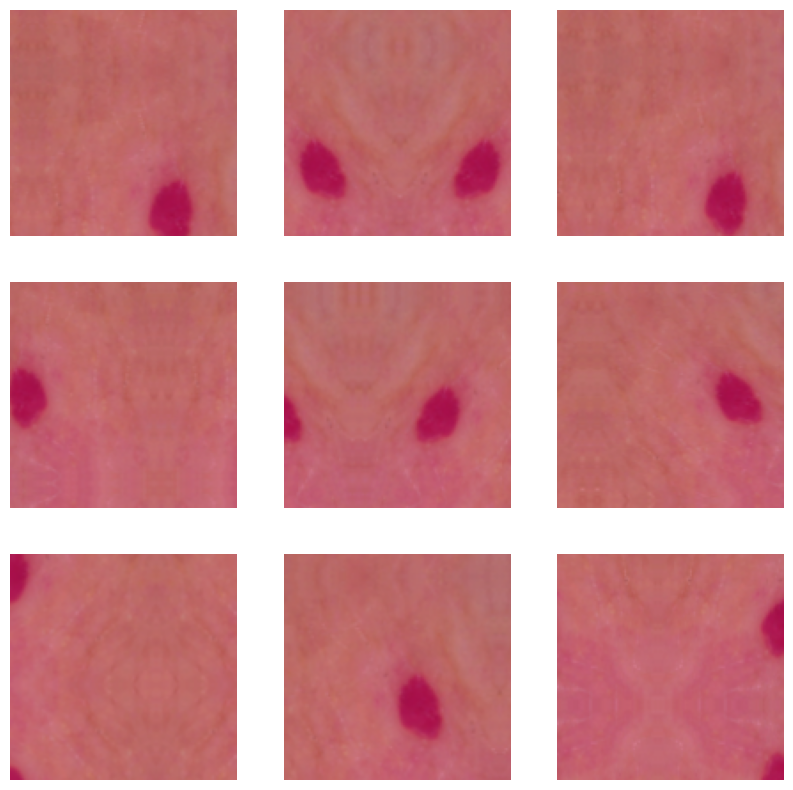

In [32]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [33]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(32, 3, padding='same', activation='relu'),

#  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(64, 3, padding='same', activation='relu'),
#  layers.Dropout(0.2),
    
  layers.MaxPooling2D(),

  layers.Conv2D(96, 3, padding='same', activation='relu'),
  
#  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  
#  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),    

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(512, activation='relu'),

  layers.Dropout(0.2),

    
  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                

In [34]:
## Your code goes here, note: train your model for 20 epochs
epochs = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
56/56 [==============================] - 4s 59ms/step - loss: 2.1111 - accuracy: 0.1808 - val_loss: 2.0283 - val_accuracy: 0.2081
Epoch 2/32
56/56 [==============================] - 3s 57ms/step - loss: 2.0262 - accuracy: 0.2238 - val_loss: 2.0043 - val_accuracy: 0.2036
Epoch 3/32
56/56 [==============================] - 3s 57ms/step - loss: 1.8710 - accuracy: 0.3041 - val_loss: 1.6775 - val_accuracy: 0.3557
Epoch 4/32
56/56 [==============================] - 3s 57ms/step - loss: 1.7707 - accuracy: 0.3482 - val_loss: 1.6204 - val_accuracy: 0.3826
Epoch 5/32
56/56 [==============================] - 3s 57ms/step - loss: 1.7630 - accuracy: 0.3287 - val_loss: 1.6790 - val_accuracy: 0.3512
Epoch 6/32
56/56 [==============================] - 3s 57ms/step - loss: 1.7079 - accuracy: 0.3616 - val_loss: 1.5882 - val_accuracy: 0.4318
Epoch 7/32
56/56 [==============================] - 3s 57ms/step - loss: 1.6253 - accuracy: 0.3828 - val_loss: 1.5821 - val_accuracy: 0.3982
Epoch 8/32
56

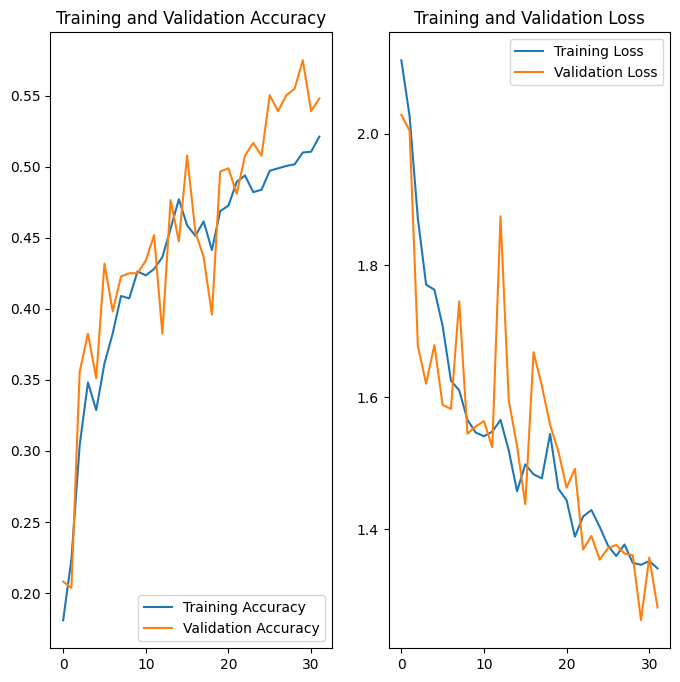

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Class=actinic keratosis, n=114 toaugment=348 (5.092%)
Class=vascular lesion, n=139 toaugment=323 (6.208%)
Class=seborrheic keratosis, n=77 toaugment=385 (3.439%)
Class=nevus, n=357 toaugment=105 (15.945%)
Class=melanoma, n=438 toaugment=24 (19.562%)
Class=basal cell carcinoma, n=376 toaugment=86 (16.793%)
Class=squamous cell carcinoma, n=181 toaugment=281 (8.084%)
Class=dermatofibroma, n=95 toaugment=367 (4.243%)
Class=pigmented benign keratosis, n=462 toaugment=0 (20.634%)


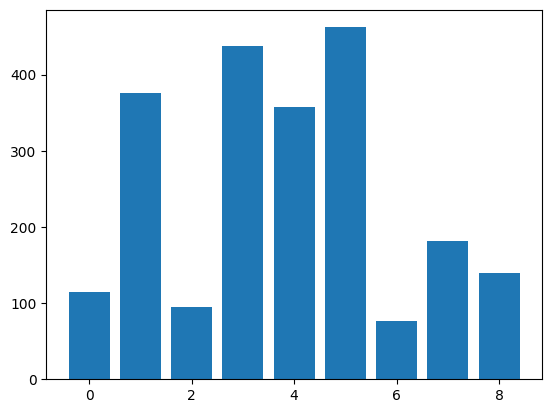

{'actinic keratosis': 348,
 'vascular lesion': 323,
 'seborrheic keratosis': 385,
 'nevus': 105,
 'melanoma': 24,
 'basal cell carcinoma': 86,
 'squamous cell carcinoma': 281,
 'dermatofibroma': 367,
 'pigmented benign keratosis': 0}

In [62]:
## Your code goes here.

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

from sklearn.preprocessing import LabelEncoder
from collections import Counter

# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# summarize distribution
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))

counter = Counter(y)

maxval = max(counter.values())

samples_to_augment = dict()


for k,v in counter.items():
    per = v / len(y) * 100    
    print('Class=%s, n=%d toaugment=%d (%.3f%%)' % (le_name_mapping[k], v, maxval-v, per))
    samples_to_augment[le_name_mapping[k]] = maxval-v
    
    
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()
samples_to_augment

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [65]:
"""
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
"""

'\npath_to_training_dataset="To do"\nimport Augmentor\nfor i in class_names:\n    p = Augmentor.Pipeline(path_to_training_dataset + i)\n    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)\n    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.\n'

In [127]:
path_to_training_dataset=str(data_dir_train) +"/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(samples_to_augment[i]+500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to skin_cancer_images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA02C1825F0>: 100%|██████████| 848/848 [00:00<00:00, 851.92 Samples/s]                   


Initialised with 376 image(s) found.
Output directory set to skin_cancer_images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9F2A3E42B0>: 100%|██████████| 586/586 [00:00<00:00, 856.93 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to skin_cancer_images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9F28E6C490>: 100%|██████████| 867/867 [00:01<00:00, 854.29 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to skin_cancer_images/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9F2AD63790>: 100%|██████████| 524/524 [00:03<00:00, 173.49 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to skin_cancer_images/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F9F4DA5AD40>: 100%|██████████| 605/605 [00:03<00:00, 199.30 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to skin_cancer_images/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9F28E6CF40>: 100%|██████████| 500/500 [00:00<00:00, 815.71 Samples/s]


Initialised with 77 image(s) found.
Output directory set to skin_cancer_images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9F2ADFA1D0>: 100%|██████████| 885/885 [00:02<00:00, 405.43 Samples/s]                   


Initialised with 181 image(s) found.
Output directory set to skin_cancer_images/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9F2A300820>: 100%|██████████| 781/781 [00:01<00:00, 629.63 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to skin_cancer_images/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9F29B90D60>: 100%|██████████| 823/823 [00:01<00:00, 757.25 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [129]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6419


### Lets see the distribution of augmented data after adding new images to the original training data.

In [130]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

6419

In [131]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

6419

In [132]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [133]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [134]:
new_df=pd.concat([original_df,df2])

In [135]:
new_df['Label'].value_counts()

Label
actinic keratosis             962
vascular lesion               962
seborrheic keratosis          962
nevus                         962
melanoma                      962
basal cell carcinoma          962
squamous cell carcinoma       962
dermatofibroma                962
pigmented benign keratosis    962
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [136]:
batch_size = 32
img_height = 128
img_width = 128

#### **Todo:** Create a training dataset

In [173]:
(train_images_set,val_images_set)=tf.keras.utils.image_dataset_from_directory(data_dir_train,seed=120,image_size=(128,128),validation_split=0.3,subset="both")
train_ds = train_images_set
val_ds = val_images_set

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
"""

data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)
"""

Found 8658 files belonging to 9 classes.
Using 6061 files for training.
Using 2597 files for validation.


'\n\ndata_dir_train="path to directory with training data + data created using augmentor"\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\n  data_dir_train,\n  seed=123,\n  validation_split = 0.2,\n  subset = ## Todo choose the correct parameter value, so that only training data is refered to,,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n'

#### **Todo:** Create a validation dataset

In [98]:
"""
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)
"""

'\nval_ds = tf.keras.preprocessing.image_dataset_from_directory(\n  data_dir_train,\n  seed=123,\n  validation_split = 0.2,\n  subset = ## Todo choose the correct parameter value, so that only validation data is refered to,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n'

#### **Todo:** Create your model (make sure to include normalization)

In [169]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
    
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  
  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  layers.Dropout(0.2),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

## your code goes here

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [170]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_23 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_73 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 dropout_96 (Dropout)        (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_73 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 dropout_97 (Dropout)        (None, 64, 64, 32)        0         
                                                     

#### **Todo:**  Train your model

In [171]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
217/217 [==============================] - 6s 28ms/step - loss: 1.9113 - accuracy: 0.2705 - val_loss: 1.5897 - val_accuracy: 0.4344
Epoch 2/50
217/217 [==============================] - 6s 28ms/step - loss: 1.4499 - accuracy: 0.4397 - val_loss: 1.5088 - val_accuracy: 0.4298
Epoch 3/50
217/217 [==============================] - 6s 28ms/step - loss: 1.2663 - accuracy: 0.5279 - val_loss: 1.3222 - val_accuracy: 0.5188
Epoch 4/50
217/217 [==============================] - 6s 28ms/step - loss: 1.0647 - accuracy: 0.6109 - val_loss: 1.0838 - val_accuracy: 0.6557
Epoch 5/50
217/217 [==============================] - 6s 28ms/step - loss: 0.9521 - accuracy: 0.6460 - val_loss: 1.1553 - val_accuracy: 0.5748
Epoch 6/50
217/217 [==============================] - 6s 28ms/step - loss: 0.8262 - accuracy: 0.6989 - val_loss: 0.9310 - val_accuracy: 0.6649
Epoch 7/50
217/217 [==============================] - 6s 28ms/step - loss: 0.7189 - accuracy: 0.7399 - val_loss: 0.8979 - val_accuracy: 0.6811

#### **Todo:**  Visualize the model results

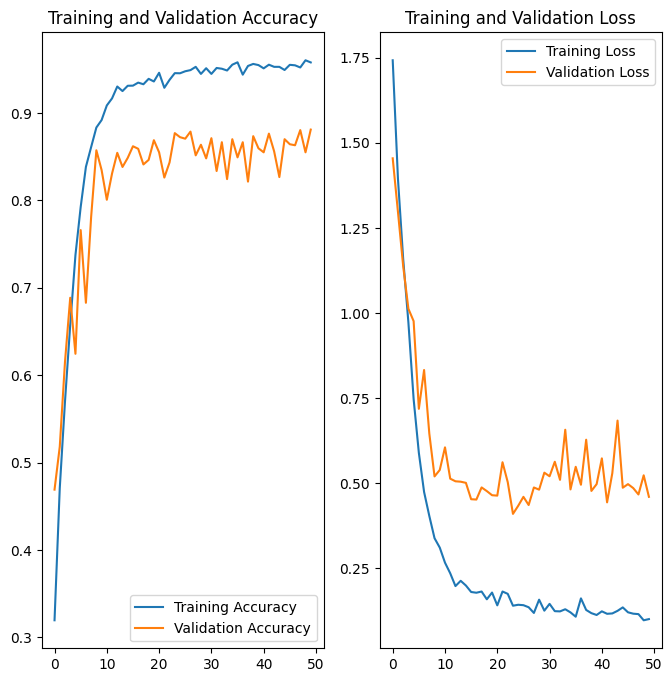

In [141]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [174]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
    
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  
  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(256, activation='relu'),

  layers.Dropout(0.2),

  layers.Dense(256, activation='relu'),

  layers.Dropout(0.2),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs = 20
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_76 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 dropout_100 (Dropout)       (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 dropout_101 (Dropout)       (None, 64, 64, 64)        0         
                                                     

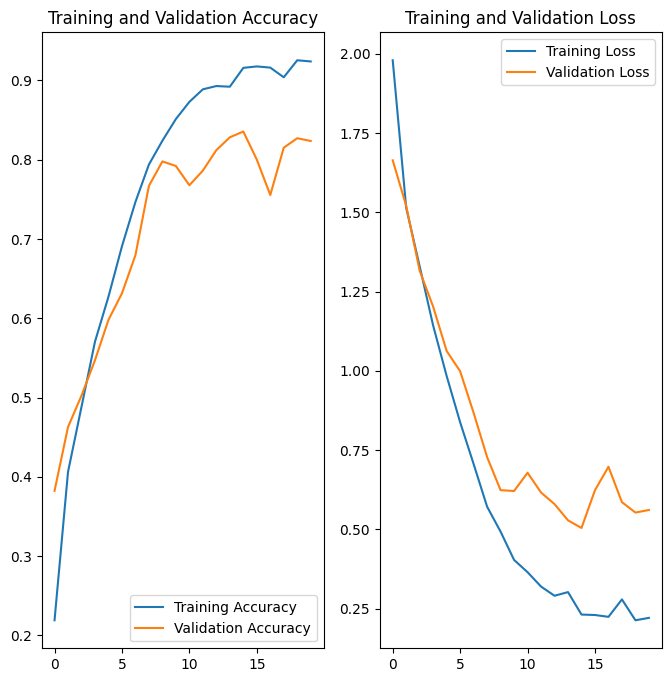

In [175]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [113]:
test_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [176]:

test_eval_result = model.evaluate(test_ds)
dict(zip(model.metrics_names, test_eval_result))

4/4 [==============================] - 1s 15ms/step - loss: 3.4685 - accuracy: 0.3729


{'loss': 3.4685304164886475, 'accuracy': 0.37288135290145874}

In [177]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
    
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  
  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  
  layers.Dropout(0.2),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(256, activation='relu'),

  layers.Dropout(0.2),

  layers.Dense(256, activation='relu'),

  layers.Dropout(0.2),
  
  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs = 15
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_25 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_79 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 dropout_105 (Dropout)       (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 dropout_106 (Dropout)       (None, 64, 64, 64)        0         
                                                     

In [178]:

test_eval_result = model.evaluate(test_ds)
dict(zip(model.metrics_names, test_eval_result))

4/4 [==============================] - 1s 18ms/step - loss: 2.6161 - accuracy: 0.4576


{'loss': 2.6160850524902344, 'accuracy': 0.4576271176338196}

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

